# Cars 

In [120]:
import pandas as pd 

In [121]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [122]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [123]:
import re

df['milage'] = df['milage'].str.replace(". mi", "", regex=True) 

In [124]:
df['milage'].unique()


array(['51,00.', '34,74.', '22,37.', ..., '71,31.', '32,25.', '53,70.'],
      shape=(2582,), dtype=object)

In [125]:
df['milage'] = df['milage'].str.strip()

In [126]:
df['milage'].isnull().sum()

np.int64(0)

In [127]:
df['milage'] = df['milage'].str.replace(r"[^\d]", "", regex=True)

df['milage'] = pd.to_numeric(df['milage'])


In [128]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,5100,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,3474,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,2237,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,8890,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,983,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,71,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,1090,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,211,NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,3300,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [129]:
type(df['milage'][0])

numpy.int64

In [130]:
df['milage'].dtype

dtype('int64')

In [131]:
import matplotlib.pyplot as plt

## The Avarage Price of the Car 

In [132]:
df['model_year'] = pd.to_datetime(df['model_year'])
df['model_year'] = df['model_year'].astype(int)
df['model_year'].dtype

dtype('int64')

In [133]:
df['price'] = df['price'].str.replace(r"[^\d]", "", regex=True)
df['price'] = pd.to_numeric(df['price'])
df['price'].dtype

dtype('int64')

In [134]:
avg_price = df.groupby('model_year')['price'].mean()
avg_price

model_year
1974    115000.000000
1992     11500.000000
1993     22522.111111
1994      7539.857143
1995     25665.333333
1996     22437.375000
1997     11611.000000
1998     12670.818182
1999     12084.666667
2000     13002.882353
2001     14754.676471
2002     14241.031250
2003     16462.836735
2004     13791.933333
2005     87680.583333
2006     22743.393939
2007     18715.632653
2008     18648.964602
2009     21413.916667
2010     18706.550000
2011     35028.669355
2012     19336.801418
2013     26574.797468
2014     24069.276243
2015     30571.859649
2016     36538.608209
2017     40554.880309
2018     50670.165079
2019     50307.077441
2020     58277.819876
2021     65286.374286
2022     68011.525424
2023     86093.429204
2024     91580.833333
Name: price, dtype: float64

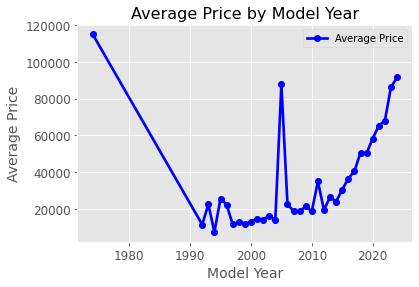

In [135]:
plt.Figure(figsize=(10, 6))
plt.plot(avg_price.index, avg_price.values, marker='o', color='b', label='Average Price')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.title('Average Price by Model Year')
plt.legend()
plt.show()

In [136]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,5100,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,3474,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,2237,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,8890,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,983,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,71,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950
4005,Audi,S4 3.0T Premium Plus,2022,1090,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
4006,Porsche,Taycan,2022,211,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998
4007,Ford,F-150 Raptor,2020,3300,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


In [137]:
number_of_cars = df.shape[0]
number_of_cars

4009

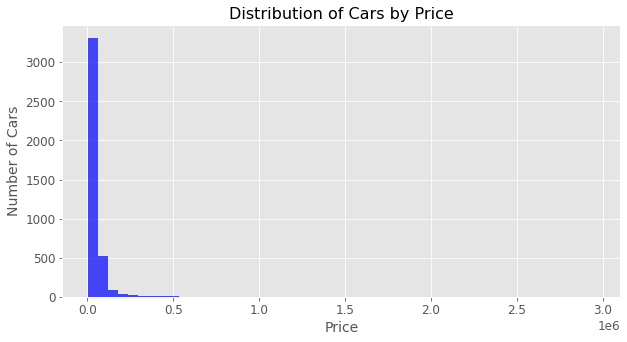

In [138]:
distribution_of_cars = df.groupby('price')['price'].count()
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, color='b', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars by Price')
plt.show()

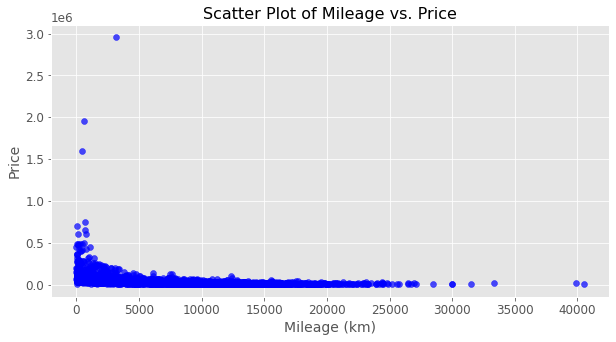

In [139]:
plt.figure(figsize=(10, 5))
plt.scatter(df['milage'], df['price'], color='b', alpha=0.7)
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.title('Scatter Plot of Mileage vs. Price')
plt.show()

In [140]:
top_10_models = df.groupby('model')['price'].mean().sort_values(ascending=False).head(10)
df_top_10_models = df[df['model'].isin(top_10_models.index)]
df_top_10_models

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
229,Bugatti,Veyron 16.4 Grand Sport,2011,633,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
304,Rolls-Royce,Phantom Drophead Coupe Drophead,2013,295,Gasoline,6.8L V12 48V GDI DOHC,8-Speed Automatic,Yellow,–,None reported,Yes,488880
487,Rolls-Royce,Cullinan,2022,11,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,Grace White,None reported,Yes,449995
624,Rolls-Royce,Cullinan,2022,39,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,Silver,Charles Blue,None reported,Yes,695000
693,Maserati,Quattroporte Base,2005,3200,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
979,Lamborghini,Aventador SVJ Base,2019,692,Gasoline,759.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,649999
1061,Dodge,Viper GTC,2017,138,Gasoline,645.0HP 8.4L 10 Cylinder Engine Gasoline Fuel,M/T,Black,Black,None reported,Yes,489995
1143,Maserati,Quattroporte Base,2006,6184,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Beige,None reported,Yes,16500
1356,Lamborghini,Aventador SVJ Base,2021,698,Gasoline,6.5L V12 48V MPFI DOHC,7-Speed,–,Nero Ade,None reported,Yes,749950
1508,Rolls-Royce,Phantom,2018,758,Gasoline,6.8L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,–,None reported,Yes,599000


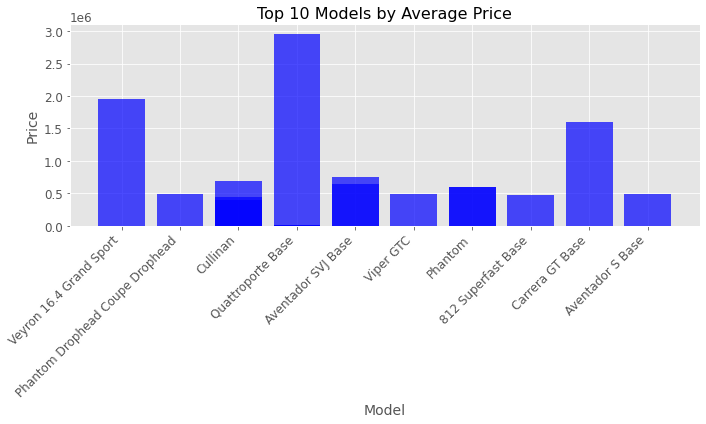

In [141]:


plt.figure(figsize=(10, 6))
plt.bar(df_top_10_models['model'], df_top_10_models['price'], color='b', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Top 10 Models by Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\yop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


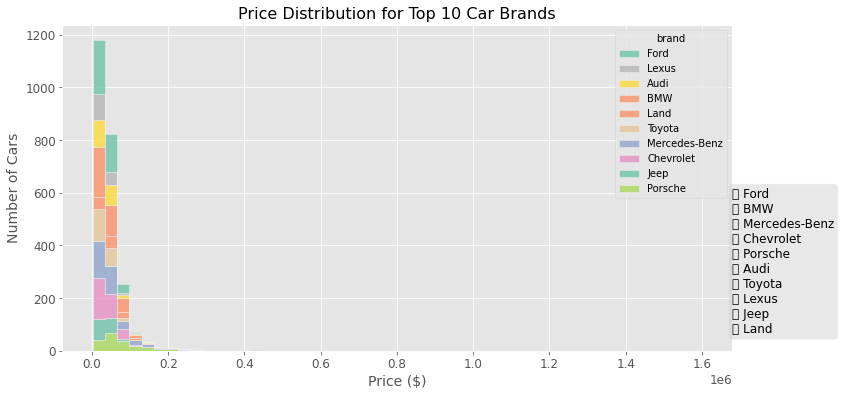

In [ ]:

import seaborn as sns


# Load dataset (Ensure 'price' column is cleaned)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Select top 10 car brands by count
top_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]

# Define color palette
palette = sns.color_palette("Set2", len(top_brands))
brand_colors = dict(zip(top_brands, palette))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
sns.histplot(
    data=df_top_brands, x='price', hue='brand', element='step', multiple='stack',
    bins=50, palette=brand_colors, ax=ax
)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Number of Cars")
ax.set_title("Price Distribution for Top 10 Car Brands")

# Add a sidebar with brand descriptions
description_text = "\n".join([f"🟩 {brand}" for brand in top_brands])  # Adjust color markers
props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
ax.text(df_top_brands['price'].max() * 1.05, ax.get_ylim()[1] * 0.5, description_text, 
        fontsize=12, verticalalignment='top', bbox=props)

plt.show()
